In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("D:\itvedant\Vscode\winequality.csv")

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Admin\AppData\Local\Temp\ipykernel_48872\4242055579.py:1: SyntaxWarning: invalid escape sequence '\i'
  df=pd.read_csv("D:\itvedant\Vscode\winequality.csv")


In [50]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [51]:
x=df.drop('Quality',axis=1)
y=df['Quality']

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
df.shape

(1599, 12)

In [54]:
df.duplicated().sum()

240

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

In [57]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scalar=StandardScaler()

In [60]:
x_scaled=scalar.fit_transform(x)

In [61]:
round(x_scaled.mean())

0

In [62]:
print(x_scaled.var())

1.0


In [63]:
x_scaled.shape

(1599, 11)

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca=PCA(n_components=2)

In [66]:
x_pca=pca.fit_transform(x_scaled)

In [67]:
x_pca

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [68]:
df_pca=pd.DataFrame(x_pca,columns=['PC1','PC2'])

In [69]:
df_pca.head(2)

,PC1,PC2
0,-1.61953,0.450950
1,-0.79917,1.856553


In [70]:
df_pca['Quality']=df['Quality']

In [71]:
df_pca.head()

,PC1,PC2,Quality
0,-1.619530,0.450950,0.0
1,-0.799170,1.856553,0.0
2,-0.748479,0.882039,0.0
3,2.357673,-0.269976,1.0
4,-1.619530,0.450950,NaN


In [72]:
df_pca.shape

(1599, 3)

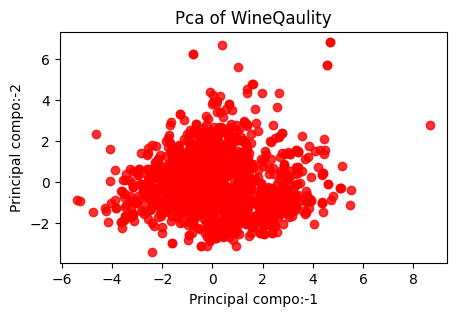

In [73]:
plt.figure(figsize=(5,3))
plt.scatter(df_pca['PC1'],df_pca['PC2'],c='r',alpha=0.8)
plt.xlabel("Principal compo:-1")
plt.ylabel("Principal compo:-2")
plt.title("Pca of WineQaulity")
plt.show()

# Now df_pca is labeled data apply all classification algo on df_pca

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.